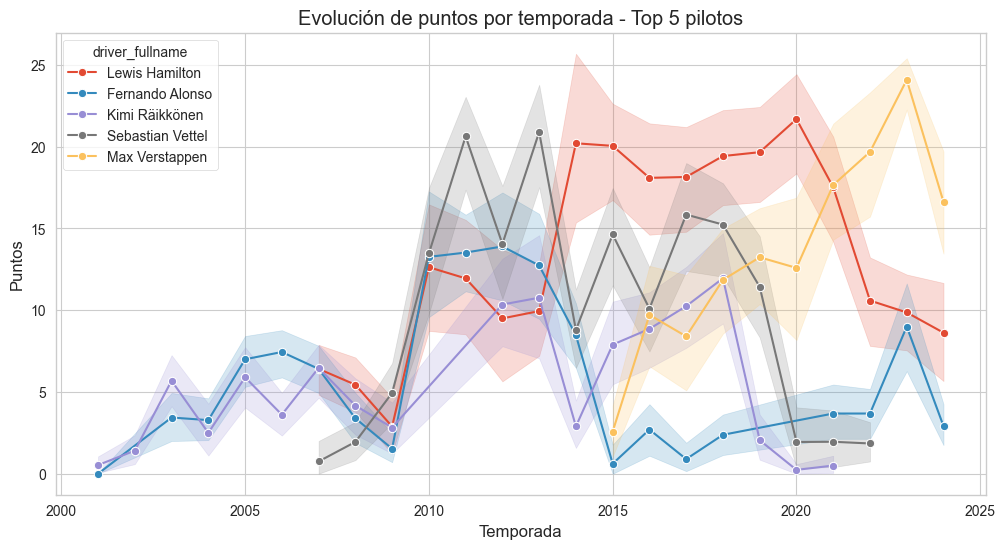

C:\Users\edisl\AppData\Local\Temp\ipykernel_19756\4085722431.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_points.index, y=team_points.values, palette='viridis')


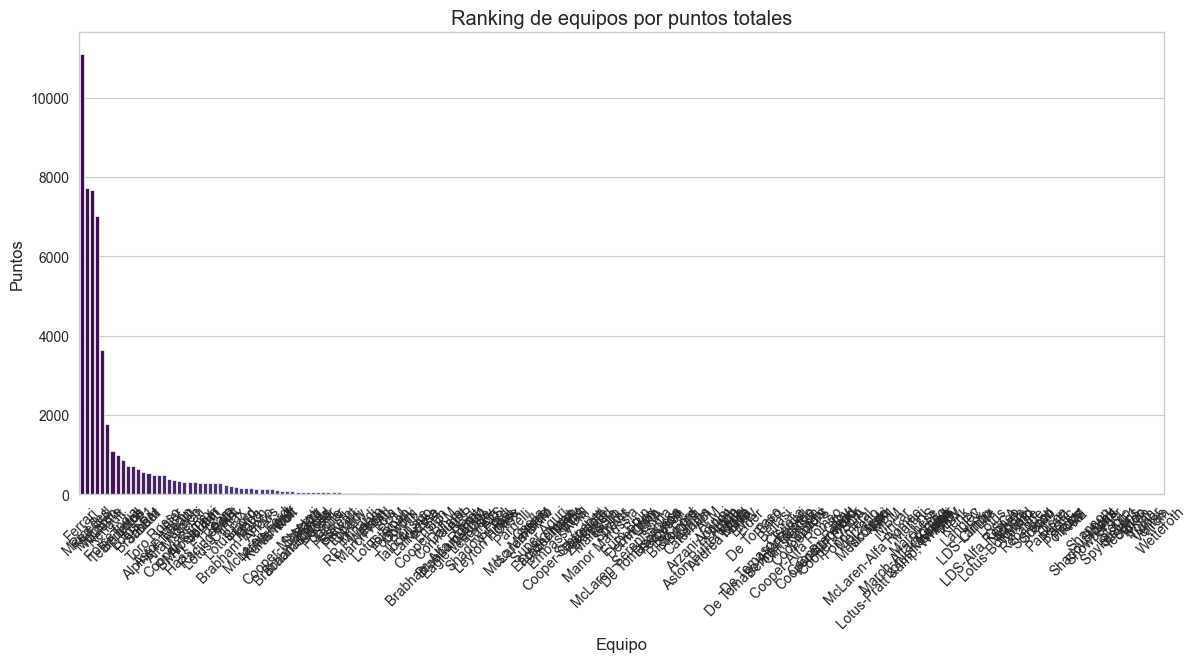

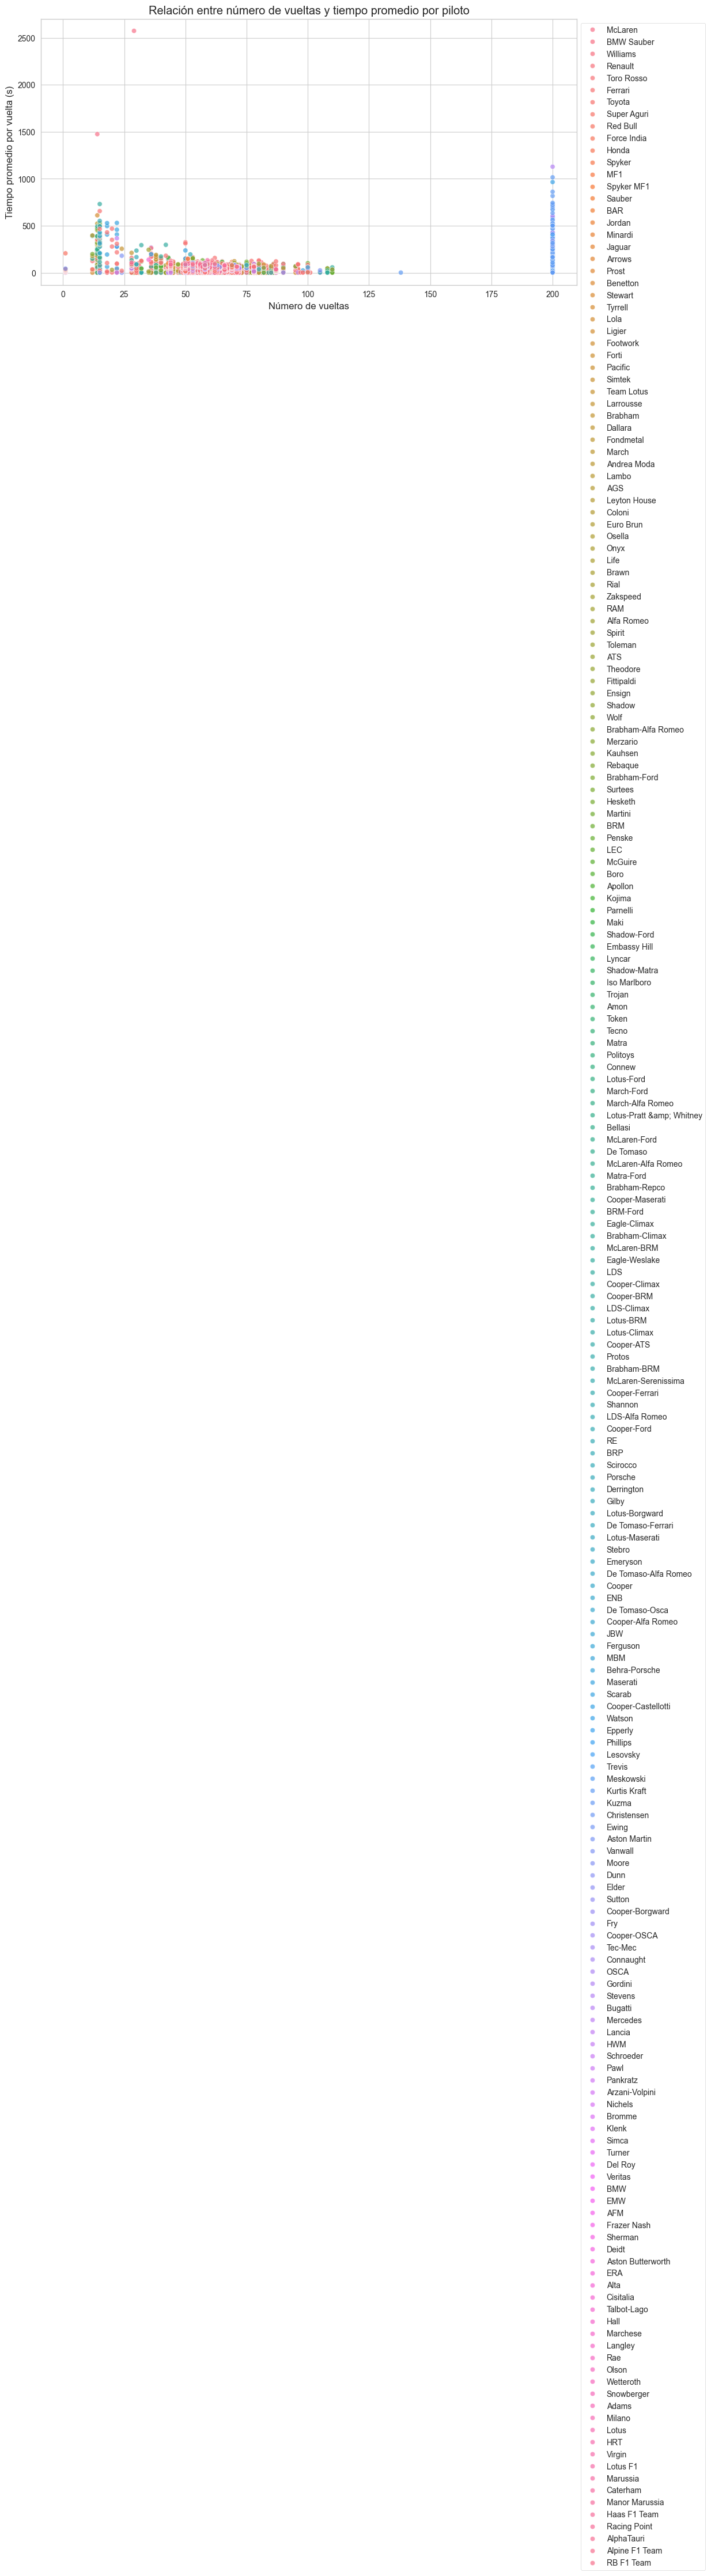

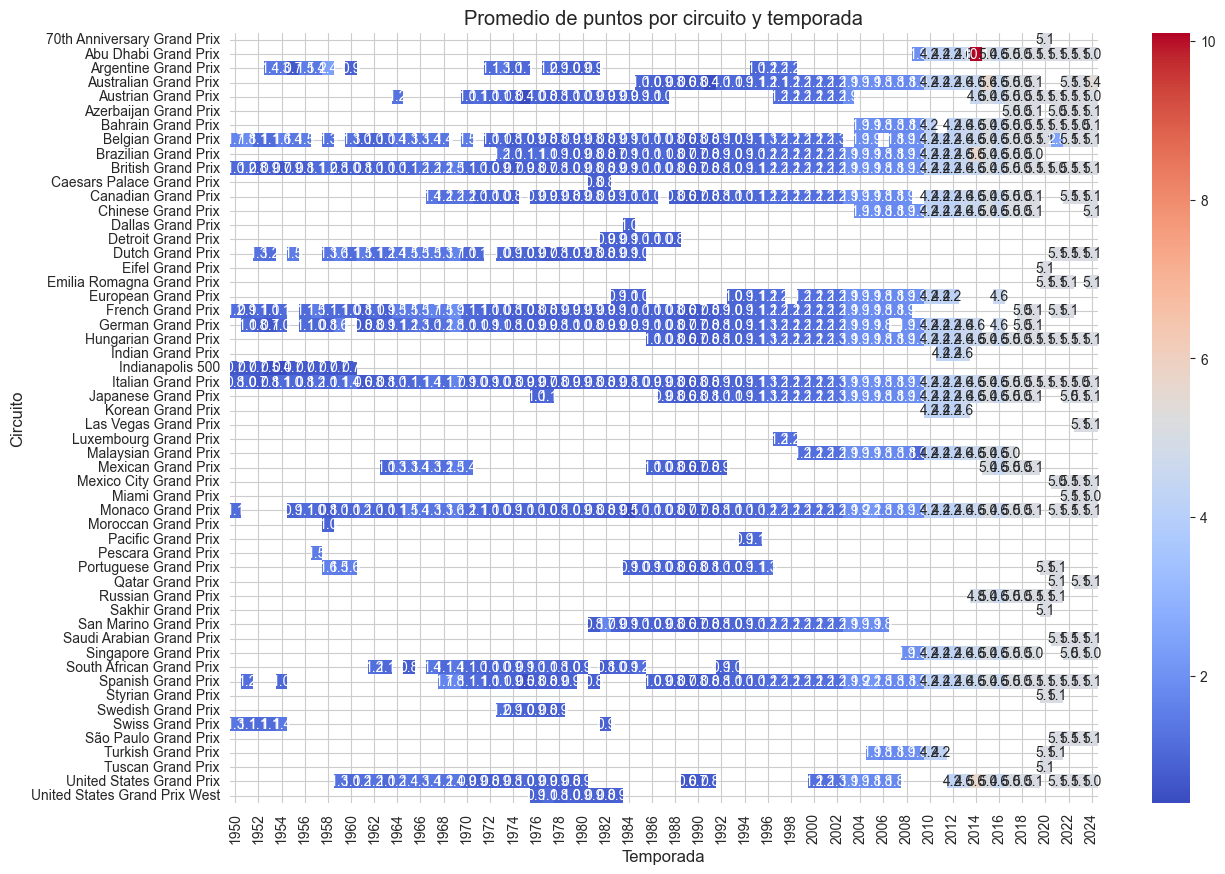

C:\Users\edisl\AppData\Local\Temp\ipykernel_19756\4085722431.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='race_name', y='points', palette='Set2')


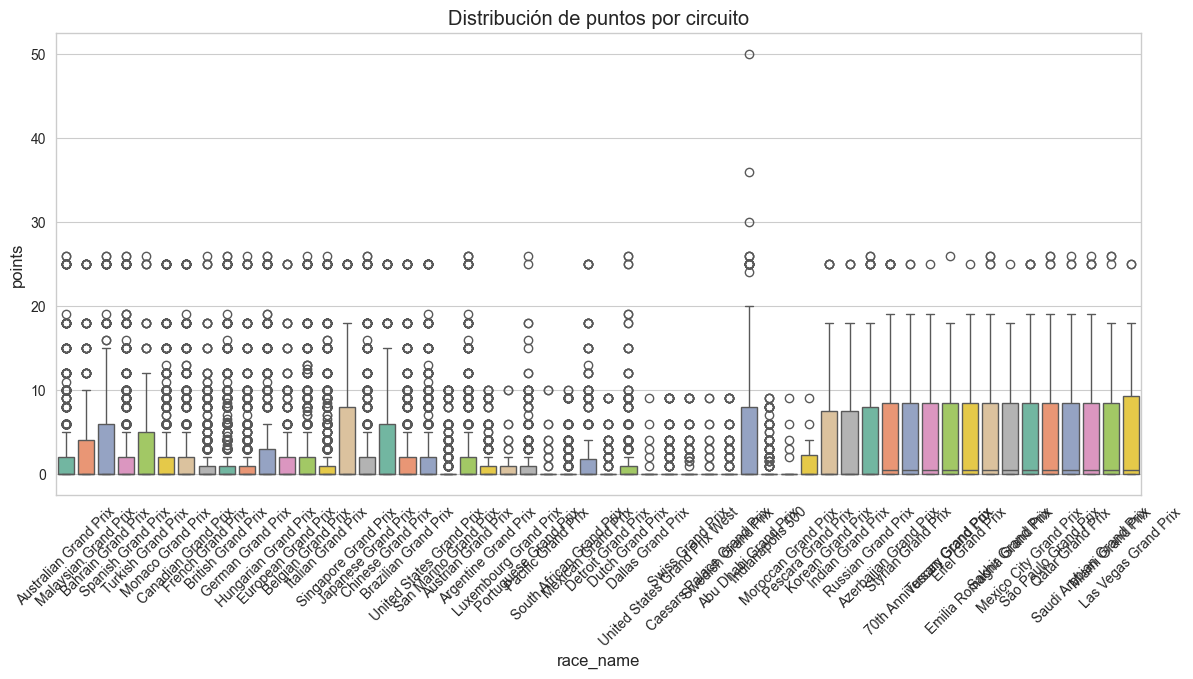

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use('ggplot')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

df = pd.read_csv("../Data/f1_clean_Dataset.csv")
df.head()

top_drivers = df.groupby('driver_fullname')['points'].sum().sort_values(ascending=False).head(5).index
df_top = df[df['driver_fullname'].isin(top_drivers)]

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_top,
    x='year',
    y='points',
    hue='driver_fullname',
    marker='o'
)
plt.title('Evolución de puntos por temporada - Top 5 pilotos')
plt.xlabel('Temporada')
plt.ylabel('Puntos')
plt.show()

team_points = df.groupby('team_name')['points'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=team_points.index, y=team_points.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Ranking de equipos por puntos totales')
plt.xlabel('Equipo')
plt.ylabel('Puntos')
plt.show()

def time_to_seconds(t):
    try:
        if pd.isna(t):
            return None
        parts = t.split(':')
        if len(parts) == 2:
            return int(parts[0])*60 + float(parts[1])
        else:
            return float(parts[0])
    except:
        return None

df['time_sec'] = df['time'].apply(time_to_seconds)

plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='laps', y='time_sec', hue='team_name', alpha=0.7)
plt.title('Relación entre número de vueltas y tiempo promedio por piloto')
plt.xlabel('Número de vueltas')
plt.ylabel('Tiempo promedio por vuelta (s)')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

circuit_perf = df.pivot_table(index='race_name', columns='year', values='points', aggfunc='mean')

plt.figure(figsize=(14,10))
sns.heatmap(circuit_perf, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Promedio de puntos por circuito y temporada')
plt.xlabel('Temporada')
plt.ylabel('Circuito')
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='race_name', y='points', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribución de puntos por circuito')
plt.show()

fig = px.line(
    df_top,
    x='year',
    y='points',
    color='driver_fullname',
    markers=True,
    title='Evolución de puntos por temporada - Top 5 pilotos'
)
fig.show()

fig2 = px.bar(
    team_points.reset_index(),
    x='team_name',
    y='points',
    color='team_name',
    title='Ranking de equipos por puntos totales'
)
fig2.show()
